# 😀 Chapter 2: Statistical Learning
We will skip the first part of the section because we shall assume that we have the basics of programming in Python. Thus, we shall jump straight Chapter 3.

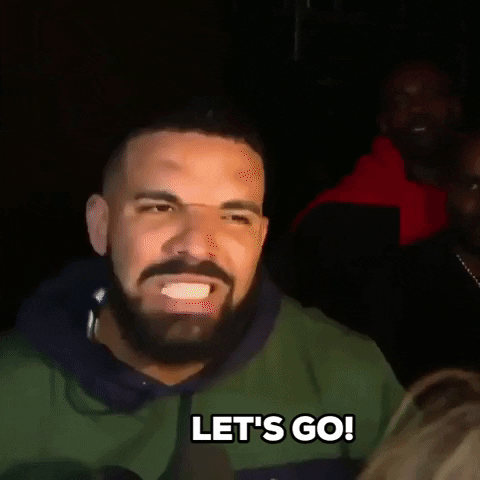

# 🚀 Chapter 3: Linear Regression


### 📦 Common Packages
The most common packages we shall use are as follows:

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

### 📊 statsmodels and ISLP Packages

These are the most important packages for at least this Chapter. So, let's load them.

In [2]:
import statsmodels.api as sm

# the \ is a line continuation character
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Part 1: 📈 Simple Linear Regression
Now that we have the packages loaded, let's get our hands dirty. We shall start with Simple Linear Regression using the famous Boston data as outlined in the textbook.

#### 📚 Theory Summary

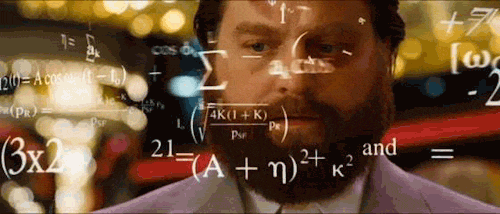

In summary, the `Simple Linear Regression` is defined as

$$Y = \beta_0 + \beta_1 X + \epsilon$$

#### 📊 Coefficient Estimating

To estimate $Y$ on the basis of $X = x$, we need to model

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1$$

where

$$
\hat{\beta}_1 = \frac{\displaystyle \sum_{i=1}^{n}{(x_i - \overline{x})(y_i - \overline{y})}}{\displaystyle \sum_{i=1}^{n}{(x_i - \overline{x})}}
$$
and
$$
\hat{\beta}_0 = \overline{y} - \hat{\beta}_1 \overline{x}
$$

and the residual sum of square $RSS$ is defined by

$$
RSS = \displaystyle \sum_{i=1}^{n}{(y_i - \hat{\beta}_0 - \hat{\beta}_i x_i)}
$$


In [4]:
# load Boston housing data
Boston = load_data('Boston')
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

For our Simple Linear Regression analysis, we will focus on two columns: `medv` (median value of owner-occupied homes) and `lstat` (percentage of lower status of the population).

Now, let's set the `X` and `y` variables first:

In [5]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X

intercept  lstat
0          1.0   4.98
1          1.0   9.14
2          1.0   4.03
3          1.0   2.94
4          1.0   5.33
..         ...    ...
501        1.0   9.67
502        1.0   9.08
503        1.0   5.64
504        1.0   6.48
505        1.0   7.88

[506 rows x 2 columns]

In [6]:
y = Boston['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

Now, here we fit the `Ordinary Least Square (OLS)` model

In [7]:
model = sm.OLS(y, X)
results = model.fit()

And then, we finally print out our regression model

In [8]:
summarize(results)

coef  std err       t  P>|t|
intercept  34.5538    0.563  61.415    0.0
lstat      -0.9500    0.039 -24.528    0.0

#### 🔍 Interpretation of the Coefficients

The coefficient of lstat is -0.95, which means that for each one unit increase in lstat, the median value of the house decreases by \$0.95. The p-value of the coefficient is very small (P < 0.05), indicating that the coefficient is statistically significant.

# On to the next one ➜

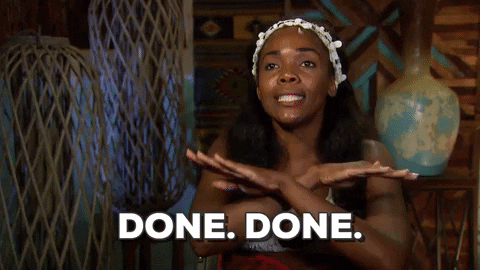